### Set-up

In [1]:
# Imports
from pandas import read_csv
import matplotlib.pyplot as plt

# Define global variables
num_features = 53

In [2]:
df = read_csv('data/dataset.csv', header = 0, index_col = 0, usecols = [i for i in range(0, num_features+1)])
df.dropna(inplace=True) # NA values after June 2017
print(df.shape)
df.head()

(294, 53)


,PALUM,PBANSOP,PBARL,PBEEF,PCOALAU,PCOCO,PCOFFOTM,PCOFFROB,PROIL,PCOPP,...,PSUGAISA,PSUGAUSA,PSUNO,PTEA,PTIN,PURAN,PWHEAMT,PWOOLC,PWOOLF,PZINC
Commodity,,,,,,,,,,,,,,,,,,,,,
1993M1,1208.10,524.92,75.08,106.80,35.0,1035.57,68.66,48.13,425.93,2264.21,...,8.24,20.76,582.52,239.49,5913.10,9.80,155.65,312.39,495.22,1067.57
1993M2,1203.15,585.61,74.83,108.32,31.0,990.99,67.46,48.25,419.78,2212.18,...,8.56,21.05,570.79,203.56,5792.75,10.10,148.88,309.68,469.37,1073.63
1993M3,1150.48,659.00,75.16,114.59,31.0,977.32,62.77,46.86,435.22,2152.38,...,10.62,21.57,574.59,190.48,5666.30,10.20,147.90,309.67,469.37,996.76
1993M4,1110.28,563.70,77.45,117.57,31.0,1010.75,56.88,45.51,454.70,1953.62,...,11.15,21.69,607.14,177.75,5596.50,10.35,141.99,328.92,429.69,1006.00
1993M5,1125.42,461.60,77.46,121.39,31.0,998.07,61.48,46.91,436.65,1799.35,...,11.83,21.36,640.15,172.86,5505.47,10.10,136.58,337.01,468.13,979.26


In [3]:
# To-Do: Simplify start_idx and end_idx from int to take in true idx value (e.g. '1993M1')
def plot_compare_commodites(df, commodity1, commodity2, start_idx, end_idx, title, tick_range):
    plot_idx = df.index[start_idx:end_idx]

    # Plots
    fig, ax = plt.subplots()
    ax.plot(plot_idx, df[commodity1][start_idx:end_idx], label=commodity1)
    ax.plot(plot_idx, df[commodity2][start_idx:end_idx], label=commodity2)

    # Title
    fig_gca = fig.gca()
    fig_gca.set_title(title)

    # Misc
    # Adjust x-axis ticks
    ax.set_xticks(range(len(plot_idx)))
    ax.set_xticklabels(
        [label if i % tick_range == 0 else '' for i, label in enumerate(plot_idx)], rotation=90
    )
    ax.tick_params(axis='x', which='both', bottom=False)  # Remove tick lines
    fig.legend()
    
    plt.show()
    

### POILBRE vs POILWTI

In [4]:
df[['POILBRE']].describe()

,POILBRE
count,294.000000
mean,51.006803
std,34.538264
min,9.800000
25%,20.005000
50%,43.040000
75%,74.580000
max,133.900000


In [5]:
df[['POILWTI']].describe()

,POILWTI
count,294.000000
mean,49.711667
std,30.702583
min,11.310000
25%,21.260000
50%,42.195000
75%,75.067500
max,133.930000


In [6]:
df[['POILBRE', 'POILWTI']].corr()

,POILBRE,POILWTI
POILBRE,1.000000,0.990427
POILWTI,0.990427,1.000000


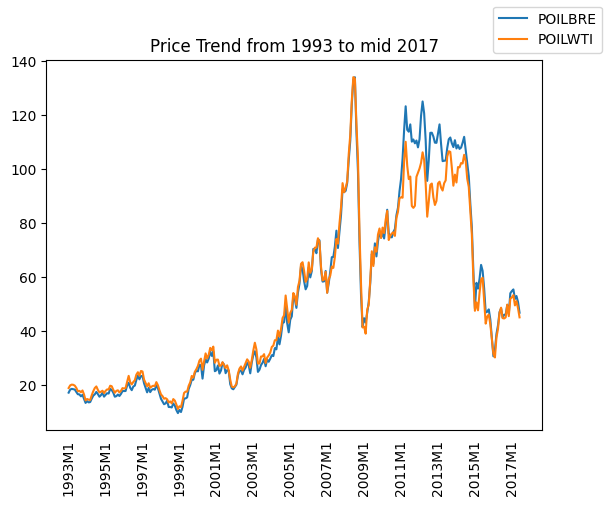

In [7]:
plot_compare_commodites(df, 'POILBRE', 'POILWTI', 0, len(df), 'Price Trend from 1993 to mid 2017', 24)

Although prices closely follow each other, there is a period where POILBRE's prices are noticeably higher than POILWTI whilst maintaining similar trends. <br> Note that pricing differentials between these commodities should generally be limited - else there is abritrage - supply and demand pressures limit the differentials.

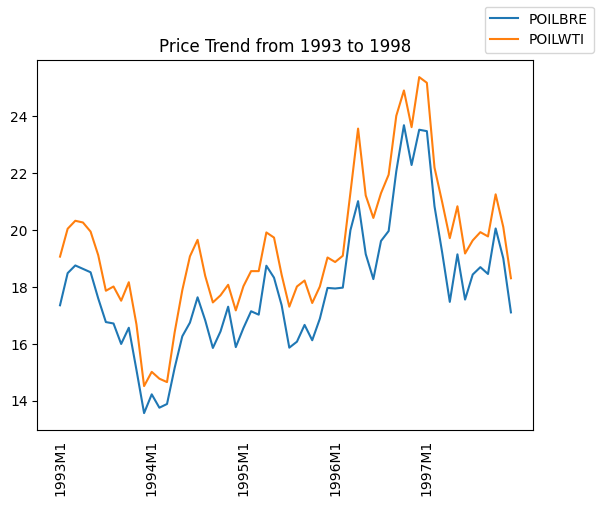

In [42]:
# Subsection
plot_compare_commodites(df, 'POILBRE', 'POILWTI', 0, 60, 'Price Trend from 1993 to 1998', 12)

In [41]:
print('Mean Price Differential from 1993 to 1998:', round(df['POILWTI'][0:60].mean() - df['POILBRE'][0:60].mean(), 3))

Mean Price Differential from 1993 to 1998: 1.468


In [40]:
print('Mean Price Differential from 1993 to 2011:', round(df['POILWTI'][0:216].mean() - df['POILBRE'][0:216].mean(), 3))

Mean Price Differential from 1993 to 2011: 1.347


We observe consistent positive spread between POILBRE and POILWTI.

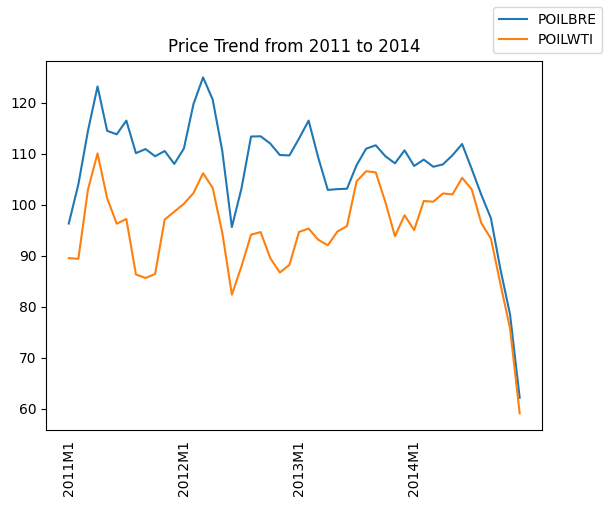

In [36]:
# Subsection with strong price differential
plot_compare_commodites(df, 'POILBRE', 'POILWTI', 216, 264, 'Price Trend from 2011 to 2014', 12)

In [11]:
print('Mean Price Differential from 2011 to 2014:', round(df['POILWTI'][216:264].mean() - df['POILBRE'][216:264].mean(), 3))

Mean Price Differential from 2011 to 2014: -12.61


Usually there is a consistent positive spread between POILBRE and POILWTI, where POILWTI is priced slightly higher than POILBRE. <br>
But from 2011 to about 2015, we observe that POILBRE has a much higher price than POILWTI.

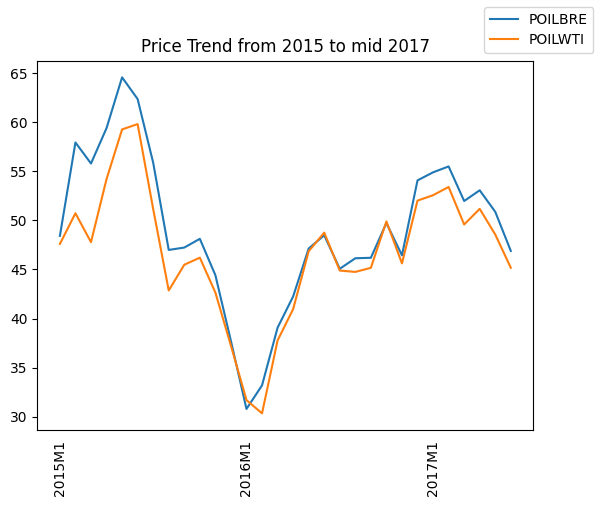

In [12]:
# Subsection after strong price differential
plot_compare_commodites(df, 'POILBRE', 'POILWTI', 264, len(df), 'Price Trend from 2015 to mid 2017', 12)

After this noticeable change in relationship between POILBRE and POILWTI from 2011 to 2014, the price differential decreases. <br>
We observe that there is no longer a consistent positive spread between POILBRE and POILWTI, POILBRE continues to **generally** be priced slightly higher than POILWTI. <br>

The latest data shows that this change in relationship has persisted: https://fredblog.stlouisfed.org/2020/05/wti-vs-brent-oil-prices-when-and-why-do-they-diverge/ <br>

The relationship between POILBRE and POILWTI before/after 2011 can be attributed to demand and supply chain constraints. <br>
Read more here: https://www.eia.gov/todayinenergy/detail.php?id=11891

### POILBRE vs other commodities

In [13]:
# Commodities with highest correlationd to POILBRE
abs(df.corr()['POILBRE']).sort_values(ascending=False)[1:11]

POILAPSP    0.999027
POILDUB     0.998764
POILWTI     0.990427
PNGASJP     0.928172
PCOPP       0.926526
PNGASEU     0.894968
PTIN        0.889407
PROIL       0.885067
PBARL       0.881864
PCOALAU     0.875712
Name: POILBRE, dtype: float64

Price-wise, these are the commodities that have the highest absolute correlation with POILBRE:
1. Oil Asia-Pacific Spot Price
2. Oil Dubai
3. Oil West Texas Intermediate 
4. Natural Gas Japan Price
5. Copper
6. Natural Gas Europe Price
7. Tin
8. Refined Oil Price
9. Oil Brent Average Reference Level (**Ignore**)
10. Coal Australia Price

In [14]:
# These commodities are all positively correlated too
poilbre_highest_corr = abs(df.corr()['POILBRE']).sort_values(ascending=False)[1:11].index
df.corr()['POILBRE'][poilbre_highest_corr]

POILAPSP    0.999027
POILDUB     0.998764
POILWTI     0.990427
PNGASJP     0.928172
PCOPP       0.926526
PNGASEU     0.894968
PTIN        0.889407
PROIL       0.885067
PBARL       0.881864
PCOALAU     0.875712
Name: POILBRE, dtype: float64

Given that there are other commodities with strong correlation to POILBRE (> 0.7), it would be interesting to compare the accuracy of a dimensionally-reduced model vs the full model in the LSTM notebook.

### LSTM Model Addendum

In this section, I want to test
1. POILBRE

    - 1.1 Effectiveness of LSTM model with top features
    - 1.2 Effectiveness of Random Forest model with top features
2. Effectiveness of LSTM model for POILWTI

In [15]:
# Imports
import numpy as np
from numpy import concatenate
from pandas import DataFrame, concat

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.ensemble import RandomForestRegressor

In [16]:
# Define global variables
num_features = 9
lag_steps = 1

In [17]:
# Transform the time-series dataset specifically for LSTM
def time_series_to_lstm(df, target_variable, lag_steps=1, dropna=True, fill='ffill'):
    """
    Transforms time-series data into a supervised learning format compatible with LSTMs.
    
    Args:
        df (pd.DataFrame): The input time-series dataset.
        target_variable (str): The column to predict.
        lag_steps (int): Number of past time steps to include.
        dropna (bool): Whether to drop rows with NaN values.
        fill (str): What to fill NaN values with ('ffill', 'bfill', 'mean', 'median', None)
        
    Returns:
        df_transformed (pd.DataFrame): DataFrame to be used as input for LSTM model
    """
    # Ensure dataframe format
    if isinstance(df, list):
        df = DataFrame(df)
    
    cols = []
    feature_names = []
    
    # Create Lag Steps
    for i in range(lag_steps, 0, -1):
        cols.append(df.shift(i))
        feature_names += [f"{col}(t-{i})" for col in df.columns]
    
    # Current time step (t) for target variable
    cols.append(df[[target_variable]])
    feature_names += [f"{target_variable}(t)"]
    
    # Combine and assign column names
    df_transformed = concat(cols, axis=1)
    df_transformed.columns = feature_names
    
    # Drop NaN rows if required
    if dropna:
        df_transformed.dropna(inplace=True)
    else:
        if not None:
            df_transformed.fillna(method=fill, inplace=True)
    
    return df_transformed

#### 1.1 LSTM (POILBRE, less features)

In [18]:
# Features
features = list(poilbre_highest_corr + '(t-1)') + ['POILBRE(t)']

# Drop PBARL (data leakage)
features.remove('PBARL(t-1)')
features


['POILAPSP(t-1)',
 'POILDUB(t-1)',
 'POILWTI(t-1)',
 'PNGASJP(t-1)',
 'PCOPP(t-1)',
 'PNGASEU(t-1)',
 'PTIN(t-1)',
 'PROIL(t-1)',
 'PCOALAU(t-1)',
 'POILBRE(t)']

In [19]:
# Transform df
df_transformed_poilbre = time_series_to_lstm(df, 'POILBRE', lag_steps)
df_transformed_poilbre = df_transformed_poilbre[features]

In [20]:
# Train-Test Split
split = int(df_transformed_poilbre.shape[0]*0.8)
train = df_transformed_poilbre[:split]
test = df_transformed_poilbre[split:]

# Scale to avoid distance calculation bias
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test) # Avoid data leakage

In [21]:
# Separate into features and target (last column)
X_train, y_train = train_scaled[:, :-1], train_scaled[:, -1]
X_test, y_test = test_scaled[:, :-1], test_scaled[:, -1]

# Reshape features for LSTM
X_train = X_train.reshape((X_train.shape[0], lag_steps, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], lag_steps, X_test.shape[1]))

print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)


Train Shape: (234, 1, 9) (234,)
Test Shape: (59, 1, 9) (59,)


In [22]:
# Initiate LSTM model
model = Sequential()
model.add(LSTM(125, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/70
2/2 - 1s - 404ms/step - loss: 0.2901 - val_loss: 0.5225
Epoch 2/70
2/2 - 0s - 21ms/step - loss: 0.2671 - val_loss: 0.4853
Epoch 3/70
2/2 - 0s - 22ms/step - loss: 0.2445 - val_loss: 0.4477
Epoch 4/70
2/2 - 0s - 22ms/step - loss: 0.2222 - val_loss: 0.4097
Epoch 5/70
2/2 - 0s - 21ms/step - loss: 0.2005 - val_loss: 0.3716
Epoch 6/70
2/2 - 0s - 21ms/step - loss: 0.1802 - val_loss: 0.3336
Epoch 7/70
2/2 - 0s - 21ms/step - loss: 0.1625 - val_loss: 0.2962
Epoch 8/70
2/2 - 0s - 21ms/step - loss: 0.1469 - val_loss: 0.2601
Epoch 9/70
2/2 - 0s - 21ms/step - loss: 0.1325 - val_loss: 0.2249
Epoch 10/70
2/2 - 0s - 21ms/step - loss: 0.1191 - val_loss: 0.1922
Epoch 11/70
2/2 - 0s - 23ms/step - loss: 0.1067 - val_loss: 0.1607
Epoch 12/70
2/2 - 0s - 23ms/step - loss: 0.0956 - val_loss: 0.1354
Epoch 13/70
2/2 - 0s - 23ms/step - loss: 0.0860 - val_loss: 0.1191
Epoch 14/70
2/2 - 0s - 22ms/step - loss: 0.0779 - val_loss: 0.1083
Epoch 15/70
2/2 - 0s - 22ms/step - loss: 0.0712 - val_loss: 0.0993
Epo

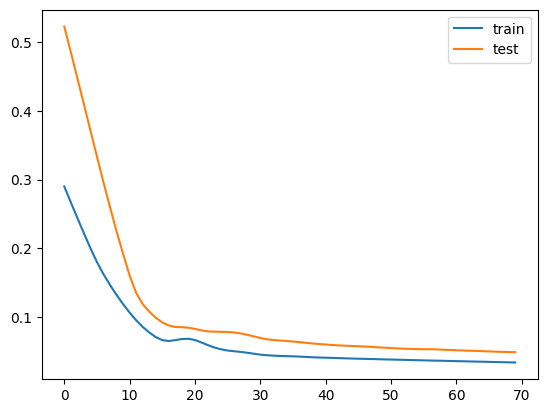

In [23]:
# Model fitting
history = model.fit(X_train, y_train, epochs=70, batch_size=128, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Plot training progression
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [24]:
# Get predicted values
yhat = model.predict(X_test)

# Reshaping back into 2D for inverse scaling
X_test_inv = X_test.reshape((X_test.shape[0], X_test.shape[2])) 

# Concatenate and Inverse Scaling
# Prediction
inv_yhat = concatenate((X_test_inv, yhat), axis=1) # Required to get back original scale
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, num_features*lag_steps] # Extract target_variable

# Validation
y_test_inv = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test_inv, y_test_inv), axis=1) # Both arrays must have same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, num_features*lag_steps]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


LSTM Test MAE: 2.473


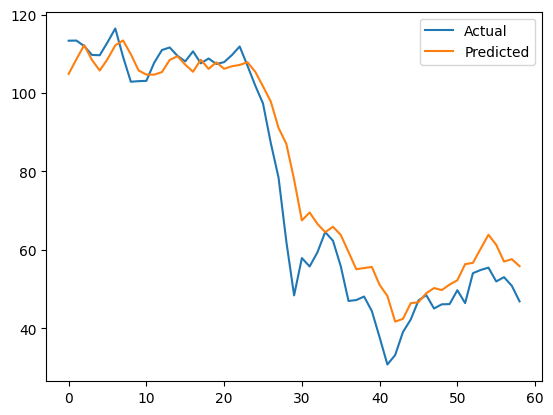

In [25]:
# Get MAE
mae = np.sqrt(mean_absolute_error(inv_y, inv_yhat))
print('LSTM Test MAE: %.3f' % mae)

plt.plot(inv_y, label = 'Actual')
plt.plot(inv_yhat, label = 'Predicted')
plt.legend()
plt.show()

We observe that narrowing down the features to those with the highest correlation reduces MAE. <br>
The predictions also follow the actual nature of the time series more consistently.

1.2 Random Forest (POILBRE, less features)

In [26]:
# Separate into features and target (last column)
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

In [27]:
rf_model = RandomForestRegressor(n_estimators=175, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

Random Forest Test MAE: 7.749


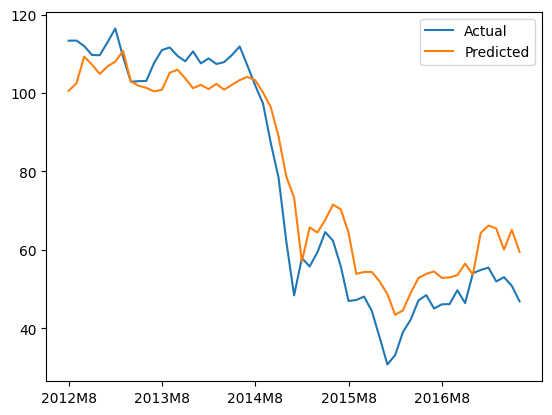

In [28]:
print('Random Forest Test MAE: %.3f' % mae)
plt.plot(y_test, label = 'Actual')
plt.plot(y_pred, label = 'Predicted')
plt.xticks(np.arange(0, 60, 12))  # Set ticks every 12 months
plt.legend()
plt.show()

Similarly, we observe an improvement in MAE by about 30% (from ~ 11 to ~ 7.7).

#### 2. POILWTI

In [29]:
# Define global variables
num_features = 53

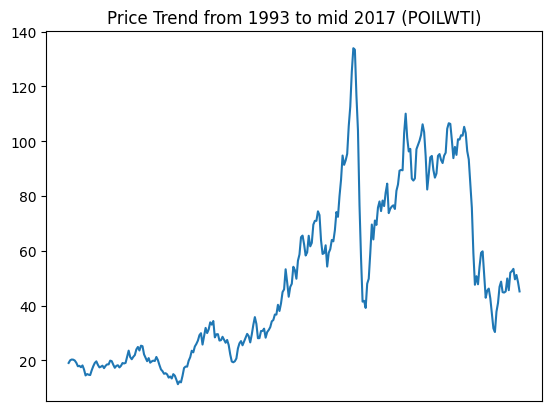

In [30]:
poilwti_line_plot = plt.plot(df.index, df['POILWTI'])
plot_gca = plt.gca()
plot_gca.set_title('Price Trend from 1993 to mid 2017 (POILWTI)')
plot_gca.axes.get_xaxis().set_ticks([])
plt.show()

For this comparison, we use the full set of features made available.

In [31]:
# Transform df
df_transformed_poilwti = time_series_to_lstm(df, 'POILWTI', lag_steps)

# Train-Test Split
split = int(df_transformed_poilwti.shape[0]*0.8)
train = df_transformed_poilwti[:split]
test = df_transformed_poilwti[split:]

# Scale to avoid distance calculation bias
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test) # Avoid data leakage

# Separate into features and target (last column)
X_train, y_train = train_scaled[:, :-1], train_scaled[:, -1]
X_test, y_test = test_scaled[:, :-1], test_scaled[:, -1]

# Reshape features for LSTM
X_train = X_train.reshape((X_train.shape[0], lag_steps, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], lag_steps, X_test.shape[1]))

print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

Train Shape: (234, 1, 53) (234,)
Test Shape: (59, 1, 53) (59,)


In [32]:
# Initiate LSTM model
model = Sequential()
model.add(LSTM(125, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

/Users/xaviersan/.pyenv/versions/brent/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/70
2/2 - 1s - 412ms/step - loss: 0.1889 - val_loss: 0.1863
Epoch 2/70
2/2 - 0s - 24ms/step - loss: 0.1185 - val_loss: 0.1298
Epoch 3/70
2/2 - 0s - 24ms/step - loss: 0.0898 - val_loss: 0.1272
Epoch 4/70
2/2 - 0s - 24ms/step - loss: 0.0929 - val_loss: 0.1701
Epoch 5/70
2/2 - 0s - 24ms/step - loss: 0.1078 - val_loss: 0.1758
Epoch 6/70
2/2 - 0s - 25ms/step - loss: 0.0984 - val_loss: 0.1415
Epoch 7/70
2/2 - 0s - 23ms/step - loss: 0.0808 - val_loss: 0.1156
Epoch 8/70
2/2 - 0s - 22ms/step - loss: 0.0735 - val_loss: 0.1082
Epoch 9/70
2/2 - 0s - 24ms/step - loss: 0.0690 - val_loss: 0.1050
Epoch 10/70
2/2 - 0s - 24ms/step - loss: 0.0622 - val_loss: 0.1035
Epoch 11/70
2/2 - 0s - 60ms/step - loss: 0.0530 - val_loss: 0.1110
Epoch 12/70
2/2 - 0s - 23ms/step - loss: 0.0487 - val_loss: 0.1242
Epoch 13/70
2/2 - 0s - 22ms/step - loss: 0.0500 - val_loss: 0.1295
Epoch 14/70
2/2 - 0s - 26ms/step - loss: 0.0487 - val_loss: 0.1235
Epoch 15/70
2/2 - 0s - 26ms/step - loss: 0.0453 - val_loss: 0.1121
Epo

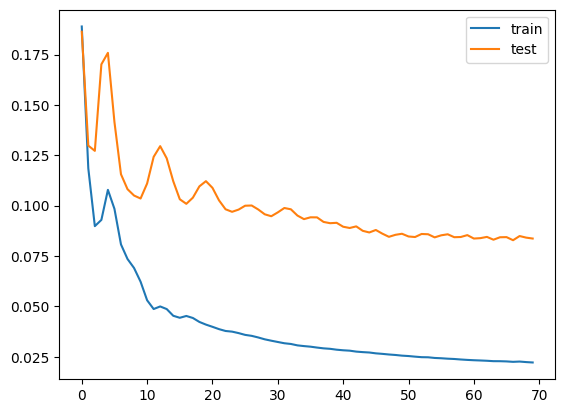

In [33]:
# Model fitting
history = model.fit(X_train, y_train, epochs=70, batch_size=128, validation_data=(X_test, y_test), verbose=2, shuffle=False)

# Plot training progression
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [34]:
# Get predicted values
yhat = model.predict(X_test)

# Reshaping back into 2D for inverse scaling
X_test_inv = X_test.reshape((X_test.shape[0], X_test.shape[2])) 

# Concatenate and Inverse Scaling
# Prediction
inv_yhat = concatenate((X_test_inv, yhat), axis=1) # Required to get back original scale
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:, num_features*lag_steps] # Extract target_variable

# Validation
y_test_inv = y_test.reshape((len(y_test), 1))
inv_y = concatenate((X_test_inv, y_test_inv), axis=1) # Both arrays must have same dimensions
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:, num_features*lag_steps]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


LSTM Test MAE: 3.203


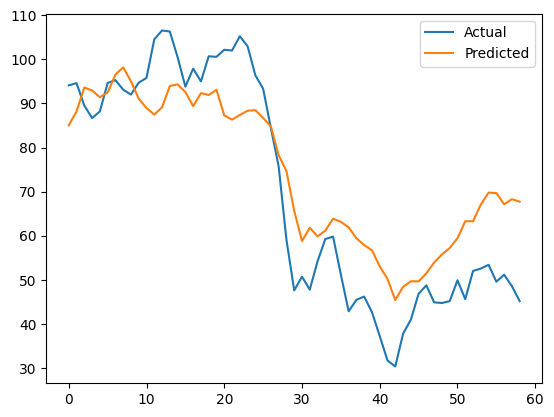

In [35]:
# Get MAE
mae = np.sqrt(mean_absolute_error(inv_y, inv_yhat))
print('LSTM Test MAE: %.3f' % mae)

plt.plot(inv_y, label = 'Actual')
plt.plot(inv_yhat, label = 'Predicted')
plt.legend()
plt.show()

Similar MAE performance with POILBRE, reducing dimensions would improve model performance further.